In [1]:
# Downloading FASTQ file from URL

!python -m wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq


Saved under SRR835775_1.first1000.fastq


In [ ]:
## This is what each quality for a read might look like:

@SRR835775.1 1/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
+
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################

In [3]:
# Read the FASTQ file

def read_fastQ(file_name):
    seq_list  = []
    qual_list = []
    
    with open(file_name,'r') as fastq_handle:
        while True:
            fastq_handle.readline() # the first line, we don't really care what it is
            sequence = fastq_handle.readline().rstrip()
            fastq_handle.readline() # again, a placeholder that we're not concerned about
            quality = fastq_handle.readline().rstrip()
            
            if len(sequence) == 0:
                break
                
            seq_list.append(sequence)
            qual_list.append(quality)
    
    return seq_list, qual_list

# testing function
seqs, quals = read_fastQ("SRR835775_1.first1000.fastq")

print(seqs[:5])
print(quals[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==

In [5]:
# convert ASCII to quality

def phred33_to_Q(qual):
    return ord(qual) - 33

# low quality
#phred33_to_Q('#')

# high quality
phred33_to_Q('J')

41

In [9]:
# Assess the qualities across all reads. How many high/low quality readings are there?
# Generate distribution of quality values.
def create_histogram(qual_list):
    hist = [0] * 50
    for qual in qual_list:
        for phred in qual:
            converted_q = phred33_to_Q(phred)
            hist[converted_q] += 1
            
    return hist

# test

qual_hist = create_histogram(quals)
print(qual_hist)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


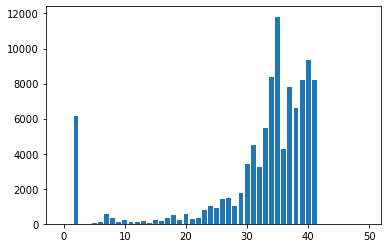

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(qual_hist)), qual_hist)
plt.show()

In [ ]:
# The spike at '2' may refer to many instances where there are equal mix of two colours (i.e., base callings)

In [13]:
# Start of practical 5: analyzing by read position
# Let's calculate the GC content. We want to know if the mix of two bases change as we move along the read.
# We expect a plateaued value, but if something goes awry, then we might see fluctuations in value


def find_GC_by_pos(read_list):
    # idea is to divide gc by total to get the average GC content at the specific positions
    gc_list = [0] * 100
    total_list = [0] * 100 #total number of bases
    
    for read in read_list:
        for i in range(len(read)):
            base = read[i]
            if base == 'C' or base == 'G':
                gc_list[i] += 1
            total_list[i] += 1
    
    for k in range(len(gc_list)):
        if float(total_list[k]) > 0:
            gc_list[k] /= float(total_list[k])
    
    return gc_list

# test
gc_content = find_GC_by_pos(seqs)
print(gc_content)

[0.486, 0.535, 0.574, 0.569, 0.58, 0.562, 0.557, 0.563, 0.562, 0.577, 0.582, 0.547, 0.531, 0.572, 0.548, 0.546, 0.566, 0.587, 0.546, 0.548, 0.578, 0.588, 0.601, 0.594, 0.534, 0.553, 0.553, 0.577, 0.626, 0.565, 0.539, 0.579, 0.558, 0.593, 0.59, 0.578, 0.579, 0.567, 0.561, 0.599, 0.591, 0.575, 0.546, 0.549, 0.574, 0.547, 0.566, 0.593, 0.553, 0.578, 0.566, 0.579, 0.596, 0.578, 0.606, 0.576, 0.551, 0.59, 0.554, 0.568, 0.575, 0.565, 0.597, 0.539, 0.584, 0.577, 0.549, 0.581, 0.598, 0.578, 0.564, 0.553, 0.571, 0.551, 0.575, 0.548, 0.591, 0.579, 0.571, 0.572, 0.558, 0.602, 0.578, 0.582, 0.548, 0.583, 0.542, 0.57, 0.601, 0.593, 0.551, 0.594, 0.543, 0.607, 0.572, 0.598, 0.598, 0.536, 0.593, 0.561]


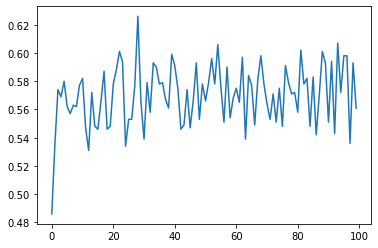

In [16]:
%matplotlib inline
plt.plot(range(len(gc_content)), gc_content)
plt.show()

In [19]:
# Distribution of bases in the reads

import collections
count = collections.Counter()

for sequence in seqs:
    count.update(sequence)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


In [ ]:
# N refers to 'no confidence'